# Clustering with scikit-learn (Digits Dataset)
We will use **KMeans** for unsupervised clustering on the Digits dataset.

## EDA for Digits Dataset

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.cluster import KMeans
import pandas as pd

In [3]:
# Load Digits dataset
digits = load_digits()
X_digits = digits.data  # 64 features (8x8 image pixels)
y_digits = digits.target

print("Digits data shape:", X_digits.shape)
print("Digits target shape:", y_digits.shape)

digits


Digits data shape: (1797, 64)
Digits target shape: (1797,)


{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]], shape=(1797, 64)),
 'target': array([0, 1, 2, ..., 8, 9, 8], shape=(1797,)),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7'

In [13]:
digits_df = pd.DataFrame(X_digits, columns=[f'feature_{i}' for i in range(X_digits.shape[1])])

# Descriptive statistics
print("\nDescriptive statistics:")
print(digits_df.describe())




Descriptive statistics:
       feature_0    feature_1    feature_2    feature_3    feature_4  \
count     1797.0  1797.000000  1797.000000  1797.000000  1797.000000   
mean         0.0     0.303840     5.204786    11.835838    11.848080   
std          0.0     0.907192     4.754826     4.248842     4.287388   
min          0.0     0.000000     0.000000     0.000000     0.000000   
25%          0.0     0.000000     1.000000    10.000000    10.000000   
50%          0.0     0.000000     4.000000    13.000000    13.000000   
75%          0.0     0.000000     9.000000    15.000000    15.000000   
max          0.0     8.000000    16.000000    16.000000    16.000000   

         feature_5    feature_6    feature_7    feature_8    feature_9  ...  \
count  1797.000000  1797.000000  1797.000000  1797.000000  1797.000000  ...   
mean      5.781859     1.362270     0.129661     0.005565     1.993879  ...   
std       5.666418     3.325775     1.037383     0.094222     3.196160  ...   
min       

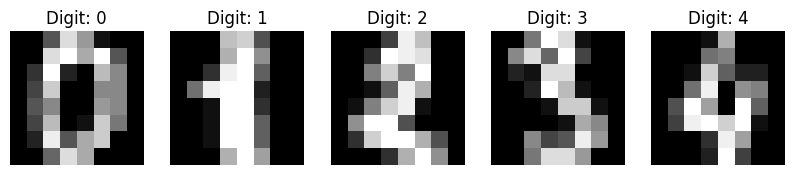

In [7]:
# Visualize a few images
fig, axes = plt.subplots(1, 5, figsize=(10, 3))
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray')
    ax.set_title(f"Digit: {digits.target[i]}")
    ax.axis('off')
plt.show()



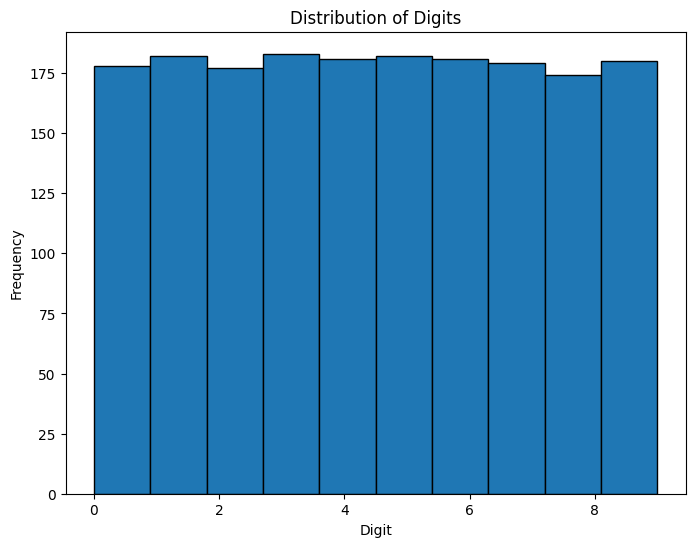

In [ ]:
# Target distribution
plt.figure(figsize=(8, 6))
plt.hist(y_digits, bins=10, edgecolor='black')
plt.title("Distribution of Digits")
plt.xlabel("Digit")
plt.ylabel("Frequency")
plt.show()



## KMeans Clustering

Cluster centers shape: (10, 64)
Inertia (Sum of squared distances): 1187766.2292515838


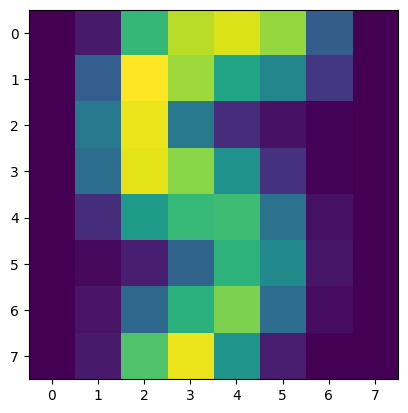

In [14]:
# Perform KMeans clustering with n_clusters=10
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(X_digits)

plt.imshow(kmeans.cluster_centers_[1].reshape(8,8))

print("Cluster centers shape:", kmeans.cluster_centers_.shape)
print("Inertia (Sum of squared distances):", kmeans.inertia_)

In [10]:
from sklearn.metrics import normalized_mutual_info_score

nmi_score = normalized_mutual_info_score(y_digits, kmeans.labels_)

print(f"Normalized Mutual Information (NMI) Score: {nmi_score}")


Normalized Mutual Information (NMI) Score: 0.7749970862895714
